<a href="https://colab.research.google.com/github/pranjul6386/covid19/blob/master/mafa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from keras.models import Sequential
import cv2
import random as rand
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/MAFA-Label-Test.zip"
!unzip "/content/drive/MyDrive/Datasets/MAFA-Label-Train.zip"
!unzip "/content/drive/MyDrive/Datasets/test-images.zip"

!unzip "/content/drive/MyDrive/Datasets/train-images.zip"

In [6]:
!pip install mafaextractor

     |████████████████████████████████| 28.5 MB 47 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
from mafaextractor import extract_mafa
df_test = extract_mafa("/content/LabelTestAll.mat")
df_train=extract_mafa("/content/LabelTrainAll.mat")

In [8]:
df_test.head()

,img_name,x_face_min,y_face_min,face_width,face_height,face_type,occ_width,occ_height,occ_type,occ_degree,gender,race,orientation,glasses_width,glasses_height,x_face_max,y_face_max,x_occ_min,y_occ_min,x_occ_max,y_occ_max,x_glasses_min,x_glasses_max,y_glasses_min,y_glasses_max
0,test_00000001.jpg,2694.0,1211.0,353.0,353.0,1.0,144.0,337.0,2.0,3.0,2.0,2.0,1.0,-1.0,-1.0,3047.0,1564.0,2703.0,1316.0,2838.0,1548.0,-1.0,-1.0,-1.0,-1.0
1,test_00000001.jpg,1754.0,1449.0,68.0,68.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1822.0,1517.0,1753.0,1448.0,1753.0,1448.0,-1.0,-1.0,-1.0,-1.0
2,test_00000002.jpg,113.0,95.0,226.0,226.0,1.0,181.0,221.0,1.0,3.0,1.0,2.0,3.0,-1.0,-1.0,339.0,321.0,122.0,166.0,294.0,316.0,-1.0,-1.0,-1.0,-1.0
3,test_00000003.jpg,352.0,114.0,151.0,151.0,1.0,137.0,135.0,1.0,3.0,2.0,2.0,3.0,-1.0,-1.0,503.0,265.0,369.0,159.0,489.0,249.0,-1.0,-1.0,-1.0,-1.0
4,test_00000003.jpg,799.0,217.0,139.0,139.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,938.0,356.0,798.0,216.0,798.0,216.0,-1.0,-1.0,-1.0,-1.0


In [9]:
df_train.head()

,img_name,x_face_min,y_face_min,face_width,face_height,left_eye_x,left_eye_y,right_eye_x,right_eye_y,occ_width,occ_height,occ_type,occ_degree,gender,race,orientation,glasses_width,glasses_height,x_face_max,y_face_max,x_occ_min,y_occ_min,x_occ_max,y_occ_max,x_glasses_min,x_glasses_max,y_glasses_min,y_glasses_max
0,train_00000001.jpg,95,160,91,91,113,177,158,172,82,89,1,3,1,1,3,-1,-1,186,251,102,186,177,249,-1,-1,-1,-1
1,train_00000002.jpg,107,82,66,66,129,95,156,96,65,56,2,3,1,1,3,-1,-1,173,148,112,99,172,138,-1,-1,-1,-1
2,train_00000003.jpg,56,170,185,185,140,198,196,208,147,182,1,3,1,1,4,-1,-1,241,355,97,226,203,352,-1,-1,-1,-1
3,train_00000004.jpg,162,208,71,71,182,229,203,238,46,70,2,3,1,1,2,-1,-1,233,279,169,234,208,278,-1,-1,-1,-1
4,train_00000005.jpg,86,69,99,99,134,93,165,98,76,97,1,1,2,1,4,-1,-1,185,168,92,139,162,166,-1,-1,-1,-1


In [4]:
import scipy.io
matTrain = scipy.io.loadmat('/content/LabelTrainAll.mat')
matTest = scipy.io.loadmat('/content/LabelTestAll.mat')

In [5]:
print(matTrain.keys())
print(matTest.keys())

dict_keys(['__header__', '__version__', '__globals__', 'label_train'])
dict_keys(['__header__', '__version__', '__globals__', 'LabelTest'])


In [6]:

#Read train
label_train = matTrain['label_train']
print(label_train.dtype)
print(label_train.shape,label_train.size)
print(label_train[0,0]['imgName'],label_train[0,0]['label'])
imgName = label_train[0]['imgName']
label = label_train[0]['label']

[('orgImgName', 'O'), ('imgName', 'O'), ('label', 'O')]
(1, 25876) 25876
['train_00000001.jpg'] [[ 95 160  91  91 113 177 158 172   7  26  82  89   1   3   1   1   3  -1
   -1  -1  -1]]


In [ ]:

#Write Train
import cv2
import numpy as np
import os 
pathIn = '/content/images'
pathOut = '/content/MAFA-Crop/train'
numM1, numM2, numN = 0, 0, 0
index = 1
for i in range(label.size):
  img_name = pathIn + "/" + imgName[i][0]
  img_path=""
  print(img_name)
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[y:y+int(h), x:x+int(w)]
  img_label = label[i][0][12]
  if img_label == 1:
    numM1 += 1
    if numM1 > 1000: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 1000: continue
    img_label = 'M'
  else: 
    numN += 1
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)

In [7]:

label_test = matTest['LabelTest']
print(label_test.dtype)
print(label_test.shape,label_test.size)
print(label_test[0,0]['name'],label_test[0,0]['label'])
imgName = label_test[0]['name']
label = label_test[0]['label']

[('name', 'O'), ('label', 'O')]
(1, 4935) 4935
['test_00000001.jpg'] [[2694 1211  353  353    1    9  105  144  337    2    3    2    2    1
    -1   -1   -1   -1]
 [1754 1449   68   68    3   -1   -1   -1   -1   -1   -1   -1   -1   -1
    -1   -1   -1   -1]]


In [8]:
import cv2
import numpy as np
import os 
pathIn = '/content/images'
pathOut = '/content/MAFA-Crop/test'
numM1, numM2, numN = 0, 0, 0 #Want test set has 1000 imgs
index = 1
for i in range(label.size):
  img_name = os.path.join(pathIn, imgName[i][0])
  img = cv2.imread(img_name)
  x,y,w,h = label[i][0][0:4]
  crop_img = img[int(y):int(y)+int(h), int(x):int(x)+int(w)]
  img_label = int(label[i][0][9])
  if img_label == 1:
    numM1 += 1
    if numM1 > 250: continue
    img_label = 'M'
  elif img_label == 2: 
    numM2 += 1
    if numM2 > 250: continue
    img_label = 'M'
  else: 
    numN += 1
    if numN > 500: continue
    img_label = 'N'
  img_name_out = img_label + '_' + str(index) + '.jpg'
  index += 1
  img_crop_name = os.path.join(pathOut, img_name_out)
  cv2.imwrite(img_crop_name, crop_img)

In [23]:

# defines

DIR_IMG_TRAIN = '/content/MAFA-Crop/train/'
DIR_IMG_TEST = '/content/MAFA-Crop/test/'


IMG_SHAPE = (224,224,3)

In [14]:
import os
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from scipy.misc import imsave
import numpy as np
import time

ImportError: ignored

Image have shape: (91, 91, 3)


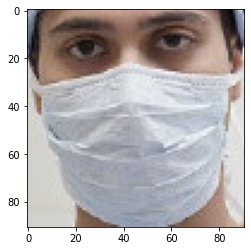

In [11]:

#EXPLORING THE DATA
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_1.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

Image have shape: (150, 150, 3)


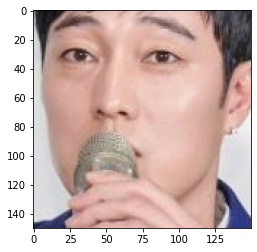

In [15]:
sample_img_path = os.path.join(DIR_IMG_TRAIN,'N_1216.jpg')
sample_img = plt.imread(sample_img_path)
plt.imshow(sample_img)
print ('Image have shape: {}'.format(sample_img.shape))

Mask #1 as image:


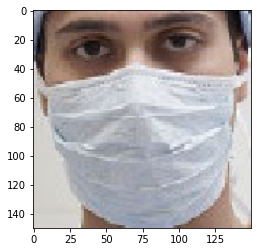

In [16]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def loadAndResizeImage (img, w, h):
    '''
    loads the image in 'img' path and returns a PIL image of size (w,h)
    '''
    return image.load_img (img, target_size=(w,h))

# Mask example resized
mask_index = 1
sample_img_path = os.path.join(DIR_IMG_TRAIN,'M_'+str(mask_index)+'.jpg')
sample_img = loadAndResizeImage (sample_img_path, IMG_SHAPE[0], IMG_SHAPE[1])
plt.imshow(sample_img)
print ('Mask #'+str(mask_index)+' as image:')

In [17]:
from PIL import Image

def getLabel (X):
    """
    Return the label for an element based on the filename: 
        mask -> 1 
        non_mask -> 0
    """
    if ('M' in X):
        return 1
    else:
        return 0
    
def getLabels (X):
    """
    Returns an array that contains the label for each X
    """
    return np.array([getLabel(X[i]) for i in range(len(X))])

def getLabelFromScore (score):
    """
    Returns the label based on the probability
    if score >= 0.5, return 'mask'
    else return 'non_mask'
    """
    if (score >=0.5):
        return 'M'
    else:
        return 'N'

def normalizedArrayFromImageInPath (image_path, img_shape):
    """
    returns an the image in 'image' path normalized in an np array
    """
    img = loadAndResizeImage (image_path, img_shape[0], img_shape[1])
    return image.img_to_array(img) / 255.

def loadResizeNormalizeImages (basepath, path_array, img_shape):
    """
    Loads the images from the path 
    and returns them in an array
    """
    images = np.empty ((len(path_array), img_shape[0], img_shape[1], img_shape[2]), dtype=np.float32)
    for i in range (len(path_array)):
        images[i] = normalizedArrayFromImageInPath (os.path.join(basepath,path_array[i]), img_shape)
    return images

In [19]:
import os
import numpy as np

train_imgs = os.listdir(DIR_IMG_TRAIN)
train_imgs.sort()

#TRAIN VALID TEST: 70 10 20 => TOTAL ~ 5000

#Training data have 3500 img
X_train = np.append(train_imgs[:1750],train_imgs[-1750:])
Y_train = getLabels (X_train)

print ("Number of training examples = {}".format(len(X_train)))
print ("Number of training labels = {}".format(len(Y_train)))

#Validation data have 500 img 
X_test = np.append(train_imgs[1750:2000],train_imgs[-2000:-1750])
Y_test = getLabels (X_test)

print ("Number of validation examples = {}".format (len(X_test)))
print ("Number of validation labels = {}".format(len(Y_test)))

Number of training examples = 3500
Number of training labels = 3500
Number of validation examples = 500
Number of validation labels = 500


In [22]:
X_train

array(['M_1.jpg', 'M_100.jpg', 'M_1000.jpg', ..., 'N_936.jpg',
       'N_949.jpg', 'N_994.jpg'], dtype='<U10')

In [21]:
Y_train.shape

(3500,)

In [25]:
Y_train

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
x_train_list=[]
img_train_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, X_train, IMG_SHAPE)
x_train_list.append(img_train_x)
x_test_list=[]
img_validation_x = loadResizeNormalizeImages (DIR_IMG_TRAIN, X_test, IMG_SHAPE)
x_test_list.append(img_validation_x)

In [34]:
x_train_array=np.array(x_train_list)
x_test_array=np.array(x_test_list)

In [36]:
x_train_array=x_train_array.reshape((3500,224,224,3))
x_test_array=x_test_array.reshape((500,224,224,3))

In [37]:
x_test_array.shape

(500, 224, 224, 3)

# Feauture extraction using renets

In [38]:
import time
import numpy as np
import tensorflow as tf
import tensorflow.keras.applications.resnet50
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.python.keras.applications.inception_v3 import preprocess_input
#from tensorflow.python.keras.applications.inception_resnet_v2 import preprocess_input

resnet_weights_path = '/content/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
#inceptionv3_weights_path = '../input/keras-pretrained-models/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
#inceptionresnetv2_weights_path = '../input/keras-pretrained-models/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

102981632/102967424 [==============================] - 1s 0us/step


In [44]:
x_train=model.predict(x_train_array)
print(x_train.shape)
x_test=model.predict(x_test_array)
print(x_test.shape)


(3500, 2048)
(500, 2048)


In [45]:
Ytrain=Y_train
Xtest=x_test
Xtrain=x_train
Ytest=Y_test

In [47]:
Ytrain

array([1, 1, 1, ..., 0, 0, 0])

In [48]:
Ytest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# SVM

Running time: 49.1730 seconds
0.652


Text(0.5, 1.0, 'Confusion Matrix')

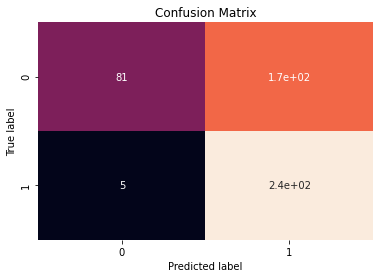

In [46]:
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report

start = time.time()

from sklearn.svm import SVC
clf = SVC(random_state=42)
clf.fit(Xtrain, Ytrain)
preds = clf.predict(Xtest)

print('Running time: %.4f seconds' % (time.time()-start))

print(accuracy_score(Ytest, preds))
import seaborn as sns
cm = confusion_matrix(Ytest, preds)
sns.heatmap(cm, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds))

# Decision tree

0.78
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       250
           1       0.78      0.78      0.78       250

    accuracy                           0.78       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.78      0.78      0.78       500



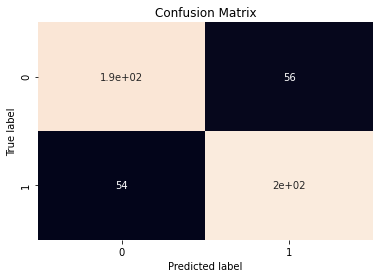

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf_des = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf_des.fit(Xtrain, Ytrain)
preds_des=clf_des.predict(Xtest)

print(accuracy_score(Ytest, preds_des))
cm1 = confusion_matrix(Ytest, preds_des)
sns.heatmap(cm1, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_des))

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#create a new random forest classifier
rf = RandomForestClassifier()
#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}
#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)
#fit model to training data
rf_gs.fit(Xtrain, Ytrain)

#save best model
rf_best = rf_gs.best_estimator_
#check best n_estimators value
print(rf_gs.best_params_)
preds_rf=rf_best.predict(Xtest)
cm4 = confusion_matrix(Ytest, preds_rf)
sns.heatmap(cm4, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_rf))

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#create new a knn model
knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors

#fit model to training data
knn.fit(Xtrain, Ytrain)
preds_knn=knn.predict(Xtest)
cm6 = confusion_matrix(Ytest, preds_knn)
sns.heatmap(cm6, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_knn))
knn.score(Xtest, Ytest)

# Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('knn', knn), ('rf', rf_best), ('svm', clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(Xtrain, Ytrain)
#test our model on the test dat
preds_en=ensemble.predict(Xtest)
cm5 = confusion_matrix(Ytest, preds_en)
sns.heatmap(cm5, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_en))
print(ensemble.score(Xtest, Ytest))

# ELM

In [ ]:
# Final edited date: 2018.3.7
# Author: Li Xudong, from NSSC.CAS Beijing
# Version: 1.0
# Description: Extreme Learning Machine (ELM) class
# Methods:
#   fit(algorithm)
#   predict(x)
#   score(x, y)
import numpy as np
from scipy.linalg import pinv2, inv
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

class elm():
    '''
    Function: elm class init
    -------------------
    Parameters:
    shape: list, shape[hidden units, output units]
        numbers of hidden units and output units
    activation_function: str, 'sigmoid', 'relu', 'sin', 'tanh' or 'leaky_relu'
        Activation function of neurals
    x: array, shape[samples, features]
        train data
    y: array, shape[samples, ]
        labels
    C: float
        regularization parameter
    elm_type: str, 'clf' or 'reg'
        'clf' means ELM solve classification problems, 'reg' means ELM solve regression problems.
    one_hot: bool, Ture or False, default True 
        The parameter is useful only when elm_type == 'clf'. If the labels need to transformed to
        one_hot, this parameter is set to be True
    random_type: str, 'uniform' or 'normal', default:'normal'
        Weight initialization method
    '''
    def __init__(self, hidden_units, activation_function,  x, y, C, elm_type, one_hot=True, random_type='normal'):
        self.hidden_units = hidden_units
        self.activation_function = activation_function
        self.random_type = random_type
        self.x = x
        self.y = y
        self.C = C
        self.class_num = np.unique(self.y).shape[0]     
        self.beta = np.zeros((self.hidden_units, self.class_num))   
        self.elm_type = elm_type
        self.one_hot = one_hot

        # if classification problem and one_hot == True
        if elm_type == 'clf' and self.one_hot:
            self.one_hot_label = np.zeros((self.y.shape[0], self.class_num))
            for i in range(self.y.shape[0]):
                self.one_hot_label[i, int(self.y[i])] = 1

        # Randomly generate the weight matrix and bias vector from input to hidden layer
        # 'uniform': uniform distribution
        # 'normal': normal distribution
        if self.random_type == 'uniform':
            self.W = np.random.uniform(low=0, high=1, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.uniform(low=0, high=1, size=(self.hidden_units, 1))
        if self.random_type == 'normal':
            self.W = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, self.x.shape[1]))
            self.b = np.random.normal(loc=0, scale=0.5, size=(self.hidden_units, 1))

    # compute the output of hidden layer according to different activation function
    def __input2hidden(self, x):
        self.temH = np.dot(self.W, x.T) + self.b

        if self.activation_function == 'sigmoid':
            self.H = 1/(1 + np.exp(- self.temH))

        if self.activation_function == 'relu':
            self.H = self.temH * (self.temH > 0)

        if self.activation_function == 'sin':
            self.H = np.sin(self.temH)

        if self.activation_function == 'tanh':
            self.H = (np.exp(self.temH) - np.exp(-self.temH))/(np.exp(self.temH) + np.exp(-self.temH))

        if self.activation_function == 'leaky_relu':
            self.H = np.maximum(0, self.temH) + 0.1 * np.minimum(0, self.temH)

        return self.H

    # compute the output
    def __hidden2output(self, H):
        self.output = np.dot(H.T, self.beta)
        return self.output

    '''
    Function: Train the model, compute beta matrix, the weight matrix from hidden layer to output layer
    ------------------
    Parameter:
    algorithm: str, 'no_re', 'solution1' or 'solution2'
        The algorithm to compute beta matrix
    ------------------
    Return:
    beta: array
        the weight matrix from hidden layer to output layer
    train_score: float
        the accuracy or RMSE
    train_time: str
        time of computing beta
    '''
    def fit(self, algorithm):
        self.time1 = time.clock()   # compute running time
        self.H = self.__input2hidden(self.x)
        if self.elm_type == 'clf':
            if self.one_hot:
                self.y_temp = self.one_hot_label
            else:
                self.y_temp = self.y
        if self.elm_type == 'reg':
            self.y_temp = self.y
        # no regularization
        if algorithm == 'no_re':
            self.beta = np.dot(pinv2(self.H.T), self.y_temp)
        # faster algorithm 1
        if algorithm == 'solution1':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.tmp1, self.H)
            self.beta = np.dot(self.tmp2, self.y_temp)
        # faster algorithm 2
        if algorithm == 'solution2':
            self.tmp1 = inv(np.eye(self.H.shape[0])/self.C + np.dot(self.H, self.H.T))
            self.tmp2 = np.dot(self.H.T, self.tmp1)
            self.beta = np.dot(self.tmp2.T, self.y_temp)
        self.time2 = time.clock()

        # compute the results
        self.result = self.__hidden2output(self.H)
        # If the problem if classification problem, the output is softmax
        if self.elm_type == 'clf':
            self.result = np.exp(self.result)/np.sum(np.exp(self.result), axis=1).reshape(-1, 1)

        # Evaluate training results
        # If problem is classification, compute the accuracy
        # If problem is regression, compute the RMSE
        if self.elm_type == 'clf':
            self.y_ = np.where(self.result == np.max(self.result, axis=1).reshape(-1, 1))[1]
            self.correct = 0
            for i in range(self.y.shape[0]):
                if self.y_[i] == self.y[i]:
                    self.correct += 1
            self.train_score = self.correct/self.y.shape[0]
        if self.elm_type == 'reg':
            self.train_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])
        train_time = str(self.time2 - self.time1)
        return self.beta, self.train_score, train_time

    '''
    Function: compute the result given data
    ---------------
    Parameters:
    x: array, shape[samples, features]
    ---------------
    Return:
    y_: array
        predicted results
    '''
    def predict(self, x):
        self.H = self.__input2hidden(x)
        self.y_ = self.__hidden2output(self.H)
        if self.elm_type == 'clf':
            self.y_ = np.where(self.y_ == np.max(self.y_, axis=1).reshape(-1, 1))[1]

        return self.y_

    '''
    Function: compute accuracy or RMSE given data and labels
    -------------
    Parameters:
    x: array, shape[samples, features]
    y: array, shape[samples, ]
    -------------
    Return:
    test_score: float, accuracy or RMSE
    '''
    def score(self, x, y):
        self.prediction = self.predict(x)
        if self.elm_type == 'clf':
            self.correct = 0
            for i in range(y.shape[0]):
                if self.prediction[i] == y[i]:
                    self.correct += 1
            self.test_score = self.correct/y.shape[0]
        if self.elm_type == 'reg':
            self.test_score = np.sqrt(np.sum((self.result - self.y) * (self.result - self.y))/self.y.shape[0])

        return self.test_score





model = elm(hidden_units=32, activation_function='relu', random_type='normal', x=Xtrain, y=Ytrain, C=0.1, elm_type='clf')
beta, train_accuracy, running_time = model.fit('solution2')
print("classifier beta:\n", beta)
print("classifier train accuracy:", train_accuracy)
print('classifier running time:', running_time)
prediction = model.predict(Xtest)
print('classifier test accuracy:', model.score(Xtest, Ytest))

preds_elm=model.predict(Xtest)
cm8 = confusion_matrix(Ytest, preds_elm)
sns.heatmap(cm8, annot=True, cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
print(classification_report(Ytest, preds_elm))


# Feature extraction using VGG